<a href="https://colab.research.google.com/github/bhavanamaanyam97/CS6200/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [ ]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-02-09 02:09:47--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-02-09 02:09:48--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-02-09 02:09:48--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [204]:
import json
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import os
from string import punctuation
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [205]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [206]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
id_list = ['APW_ENG_20100101.0001']
terms_doc = [d for d in terms if d['id'] in id_list]
sorted_by_count = sorted(terms_doc, key=lambda x: x['count'], reverse=True)

sorted_by_count[:6]

[{'count': 16, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'a'},
 {'count': 11, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'the'},
 {'count': 10, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'and'},
 {'count': 10,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'brooks'},
 {'count': 10, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'of'},
 {'count': 10, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'to'}]

In [207]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.
id_list = ['APW_ENG_20100102.0077']
terms_doc = [d for d in terms if d['id'] in id_list]
sorted_by_count = sorted(terms_doc, key=lambda x: x['count'], reverse=True)

sorted_by_count[:10]

[{'count': 50, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'the'},
 {'count': 21, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'in'},
 {'count': 21, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'to'},
 {'count': 19, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'and'},
 {'count': 14, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'of'},
 {'count': 13, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'a'},
 {'count': 8,
  'field': 'body',
  'id': 'APW_ENG_20100102.0077',
  'term': 'militants'},
 {'count': 8, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'on'},
 {'count': 8, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'said'},
 {'count': 8, 'field': 'body', 'id': 'APW_ENG_20100102.0077', 'term': 'was'}]

In [208]:
# TODO: Print the 10 terms with the highest total count in the corpus.
# sorted_by_count = sorted(terms, key=lambda x: x['count'], reverse=True)
df = pd.DataFrame(terms)
sorted_by_count = df.groupby('term').sum('count').sort_values(by='count', ascending=False)
sorted_by_count[:10]

,count
term,
the,62216
to,26931
in,25659
a,23383
of,22326
and,22125
said,10888
for,9716
on,9382


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [209]:
# TODO: Compute the number of distinct documents in the collection.
# N = 0
unique_document = set(d['id'] for d in terms)
N = len(unique_document)



# # TODO: Compute the number of distinct documents each term appears in
# # and store in a dictionary.
# df = dict()
df = dict()
for d in terms:
  if d['term'] in df:
    df[d['term']].add(d['id'])
  else:
    df[d['term']] = {d['id']}

result = dict()
for key in df:
  result[key] = len(df[key])


In [210]:
result


{'a': 2571,
 'about': 1077,
 'abuse': 26,
 'academy': 20,
 'accused': 201,
 'actress': 23,
 'ad': 16,
 'after': 1484,
 'agenda': 16,
 'agreed': 163,
 'all': 708,
 'along': 220,
 'already': 321,
 'also': 1103,
 'an': 1631,
 'and': 2521,
 'apartment': 41,
 'approved': 56,
 'arnold': 9,
 'arrange': 6,
 'as': 1615,
 'assaulting': 2,
 'at': 2020,
 'audition': 1,
 'awaiting': 16,
 'award': 28,
 'bail': 23,
 'ballad': 3,
 'being': 524,
 'benz': 4,
 'best': 193,
 'between': 520,
 'boone': 1,
 'borrowed': 13,
 'brooks': 9,
 'but': 1499,
 'by': 1760,
 'came': 317,
 'cash': 153,
 'casting': 4,
 'certificate': 3,
 'charged': 172,
 'charges': 177,
 'comedian': 7,
 'comedy': 10,
 'comment': 237,
 'companionship': 1,
 'composer': 5,
 'concerns': 129,
 'conning': 1,
 'couch': 4,
 'could': 753,
 'court': 287,
 'daddy': 1,
 'damages': 21,
 'deal': 227,
 'debby': 1,
 'declined': 157,
 "didn't": 258,
 'directed': 66,
 'director': 215,
 'disputed': 56,
 'divorce': 4,
 'dreams': 10,
 'e': 102,
 'each': 233,

In [211]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
relative_doc_freq = result['the'] / N
relative_doc_freq

0.9704823614110871

Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [212]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
tfidf_terms = None
tfidf_terms = [dict(item, tfidf = math.log(item['count'] + 1) * math.log(N / result[item['term']])) for item in terms]
tfidf_terms[:5]

# df['tfidf'] = df.apply(generateTfIdf)

# def generateTfIdf(row):
#   return math.log(row['count'] + 1) * math.log(N / result[row['term']]
# result = [dict(item, elem='value') for item in myList]


[{'count': 16,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'a',
  'tfidf': 0.21939360394288007},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'about',
  'tfidf': 0.6567928905987198},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'abuse',
  'tfidf': 3.2379607976016733},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy',
  'tfidf': 3.419817847796999},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused',
  'tfidf': 2.8851553947936432}]

In [213]:
terms[:5]

[{'count': 16, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'a'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'}]

In [214]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.

tfidf_terms_sorted = sorted(tfidf_terms, key=lambda x: x['tfidf'], reverse=True)
tfidf_terms_sorted_1 = tfidf_terms_sorted[:20]
df = pd.DataFrame(tfidf_terms_sorted_1)
print(df[['term', 'id']])


           term                     id
0       guarani  APW_ENG_20100103.0028
1    nomination  APW_ENG_20100105.0061
2       methane  APW_ENG_20100105.0446
3        kheire  APW_ENG_20100103.0015
4     greyhound  APW_ENG_20100105.0014
5   shakespeare  APW_ENG_20100107.0036
6         guild  APW_ENG_20100105.0061
7   shakespeare  APW_ENG_20100106.0428
8       elkhart  APW_ENG_20100102.0197
9         magna  APW_ENG_20100106.0075
10       sutton  APW_ENG_20100106.1325
11        tohti  APW_ENG_20100104.0043
12   greyhounds  APW_ENG_20100105.0014
13        krewe  APW_ENG_20100107.0018
14       minhas  APW_ENG_20100107.0928
15       golden  APW_ENG_20100105.0061
16       actors  APW_ENG_20100105.0061
17       pirate  APW_ENG_20100107.0018
18         punk  APW_ENG_20100103.0016
19      shiites  APW_ENG_20100104.0108


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [215]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = []
df = pd.DataFrame(terms)
df_1 = df.groupby('term').sum('count').reset_index()
frequency=list(df_1[['term', 'count']].to_records(index=False))
frequency.sort(key=lambda x:x[1], reverse=True)
frequency

[('the', 62216),
 ('to', 26931),
 ('in', 25659),
 ('a', 23383),
 ('of', 22326),
 ('and', 22125),
 ('said', 10888),
 ('for', 9716),
 ('on', 9382),
 ('that', 8942),
 ('was', 7791),
 ('is', 6317),
 ('with', 6283),
 ('at', 6078),
 ('he', 5874),
 ('it', 5357),
 ('from', 5094),
 ('as', 4746),
 ('by', 4641),
 ('has', 4355),
 ('an', 4087),
 ('have', 4012),
 ('his', 3904),
 ('be', 3693),
 ('but', 3638),
 ('s', 3567),
 ('u', 3518),
 ('were', 3478),
 ('not', 3320),
 ('are', 3218),
 ('will', 3063),
 ('its', 2955),
 ('who', 2904),
 ('had', 2900),
 ('after', 2876),
 ('year', 2816),
 ('they', 2423),
 ('this', 2331),
 ('new', 2263),
 ('been', 2241),
 ('more', 2225),
 ('two', 2136),
 ('security', 2097),
 ('or', 2076),
 ('which', 2059),
 ('about', 2003),
 ('percent', 1966),
 ('up', 1917),
 ('their', 1898),
 ('al', 1897),
 ('would', 1851),
 ('also', 1826),
 ('last', 1807),
 ('first', 1761),
 ('than', 1748),
 ('i', 1722),
 ('one', 1717),
 ('other', 1680),
 ('people', 1678),
 ('out', 1677),
 ('government',

Text(0, 0.5, 'log(frequency)')

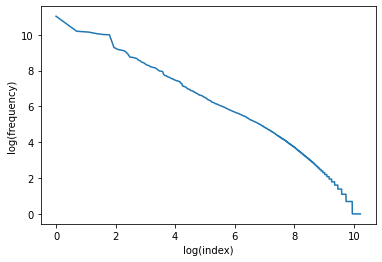

In [216]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

df_1 = df.groupby('term').sum('count').sort_values(by="count", ascending=False).reset_index().reset_index()

plt.plot(np.log(df_1['index']+1),np.log(df_1['count']))
plt.xlabel('log(index)')
plt.ylabel('log(frequency)')

In [217]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = 0
ntokens = df_1['count'].sum()
ntokens

1000000

In [218]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
df_1[:10]['count'].sum() / ntokens

0.221568

In [219]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
df_1[df_1['count'] == 1]['count'].sum() / ntokens

0.006641

## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [ ]:
## Choices Made

# 1. I decided to keep only text by removing all the html script, style tags, images, hyper links and other , 


allfiles = ['https://news.sky.com/story/bitcoin-us-seizes-2-65bn-in-cryptocurrency-linked-to-2016-hack-as-couple-arrested-12536584', 
            'https://news.sky.com/story/isis-k-us-offers-two-10m-rewards-for-intel-on-leader-and-attack-on-kabul-airport-12535740', 
            'https://news.sky.com/story/pfizer-sees-revenues-double-to-81bn-thanks-to-covid-19-vaccine-12536328']


# for directory, sub_directory, file_name in os.walk("."):
#     allfiles = [os.path.join(directory, filename) for filename in file_name]

def download_extract_data(allfiles):
  text_all = []
  for url in allfiles:
      page = urlopen(url).read()
      soup = BeautifulSoup(page, features='html.parser')
      for script_style in soup(["script", "style"]):
          script_style.extract() 
      txt = soup.get_text()
      lines = []
      for line in txt.splitlines():
        lines.append(line.strip())
      chunks = []
      for line in lines:
        for phrase in line.split(" "):
          chunks.append(phrase.strip())
      text_page = ' '.join(chunk for chunk in chunks if chunk)
      text_all.append(text_page)
  return text_all
temp = download_extract_data(allfiles)
print(temp[0]) 

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [224]:
# TODO: Tokenization code here.
import string

def generate_pattern(key, tokens, index):
  return {"count": tokens[key], "word": key, "id": index}

def isWordValid(word):
  allowed = set(string.ascii_lowercase)
  exemptions = set(['', ' ', '   '])
  return (set(word) <= allowed) and (word not in exemptions) and (len(word) > 2)

  
def perform_tokenization(txt):
  tokens_all = []
  i = 0
  for page in txt:
    current_page = ''
    for w in page.split():
      current_page += " " + w.rstrip(punctuation)
    arr = page.split(" ")
    tokens = {}
    for word in arr:
      if word not in tokens:
        if isWordValid(word): 
          tokens[word] = 1
      else:
        tokens[word] += 1

    for key in tokens:
      tokens_all.append(generate_pattern(key, tokens, i))
    i += 1
  return tokens_all
    
perform_tokenization(temp)
    



In [225]:
tokenized_data = perform_tokenization(text_all)
tokenized_data


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

Text(0, 0.5, 'log(frequency)')

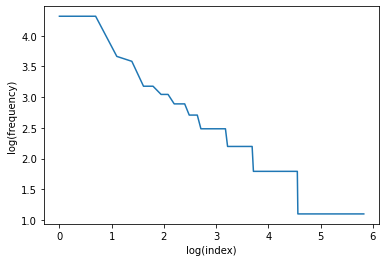

In [227]:
data = pd.DataFrame(tokenized_data)
df_2 = data.groupby('word').sum('count').sort_values(by="count", ascending=False).reset_index().reset_index()

plt.plot(np.log(df_2['index']+1),np.log(df_2['count']))
plt.xlabel('log(index)')
plt.ylabel('log(frequency)')



**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?